<a href="https://colab.research.google.com/github/pradeep9redddy/Identification-of-Age-Gender-celebrity-ID/blob/main/colab/preprocess_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import os
import dlib
import cv2
import time
import math
import datetime
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import scipy.io
import bz2
from random import randint

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/gender.caffemodel \
    -O /tmp/gender.caffemodel
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# import packages
import numpy as np
import cv2
import argparse

# construct the argument parse
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())

# load SSD and ResNet network based caffe model for 300x300 dim imgs
net = cv2.dnn.readNetFromCaffe("weights-prototxt.txt", "res_ssd_300Dim.caffeModel")

# load the input image by resizing to 300x300 dims
image = cv2.imread(args["image"])
(height, width) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

# pass the blob into the network
net.setInput(blob)
detections = net.forward()

	# loop over the detections to extract specific confidence
for i in range(0, detections.shape[2]):
    	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# greater than the minimum confidence
	if confidence > 0.5:

		box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
		(x1, y1, x2, y2) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100) + " ( " + str(y2-y1) + ", " + str(x2-x1) + " )"
		y = y1 - 10 if y1 - 10 > 10 else y1 + 10
		cv2.rectangle(image, (x1, y1), (x2, y2),
			(0, 0, 255), 2)
		cv2.putText(image, text, (x1, y),
			cv2.LINE_AA, 0.45, (0, 0, 255), 2)

# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

In [ ]:
if not os.path.exists(os.path.abspath('.') + 'mmod_human_face_detector.dat.bz2'):
    annotation_zip = tf.keras.utils.get_file('mmod_human_face_detector.dat.bz2',
                            cache_subdir=os.path.abspath('.'),
                            origin = "http://dlib.net/files/mmod_human_face_detector.dat.bz2")
# Using pythons bz2 package to read the bz2 file in binary format and write it into a .dat file
with bz2.open("mmod_human_face_detector.dat.bz2", "rb") as f:
    content = f.read()

    with open("mmod_human_face_detector.dat", "wb") as weights_file:
        weights_file.write(content)

os.remove(annotation_zip)

696320/694709 [==============================] - 1s 1us/step


In [ ]:
dataset_url = 'https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar'
annotation_folder = "wiki_crop"
if not os.path.exists(os.path.abspath('.') + annotation_folder):
    annotation_zip = tf.keras.utils.get_file('wiki.tar',
                                            cache_subdir=os.path.abspath('.'),
                                            origin = dataset_url,
                                            extract = True)
    os.remove(annotation_zip)
data_key = 'wiki'
mat_file = 'wiki.mat'

811319296/811315200 [==============================] - 5s 0us/step


In [ ]:
git clone https://github.com/linkfluence/caffe-tensorflow
source activate Python27 # You need Python 2.7

SyntaxError: ignored

In [ ]:
python convert.py --caffemodel ./places/vgg16_hybrid1365.caffemodel ./places/deploy_vgg16_hybrid1365.prototxt --data-output-path ./output.mat --code-output-path ./output2.py --standalone-output-path ./standalonehybrid.pb`

SyntaxError: ignored

In [ ]:
mat = scipy.io.loadmat(annotation_folder+'/'+mat_file)
data = mat[data_key]
route = data[0][0][2][0]
name = []
age = []
gender = []
images = []
total = 0
project_path = "drive/My Drive/Colab Notebooks/Pradeep/Gender Classifier"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


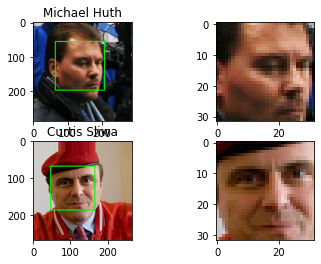

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
plt.figure()
i = 1

while(i <= 4):
    index = randint(0, len(route))
    if((math.isnan(data[0][0][6][0][index]) == False and data[0][0][6][0][index] > 0)):
        img = cv2.imread('wiki_crop/'+data[0][0][2][0][index][0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces_cnn = cnn_face_detector(img, 1)

        for face in faces_cnn:
            offset_x , offset_y  = max(faces_cnn[0].rect.left(),0),max(faces_cnn[0].rect.top(),0)
            target_width, target_height = faces_cnn[0].rect.right() - offset_x, faces_cnn[0].rect.bottom() - offset_y
            target_width = min(target_width, img.shape[1]-offset_x)
            target_height = min(target_height, img.shape[0]-offset_y)
            # draw box over face
            face_img = tf.image.crop_to_bounding_box(img, 
                                                    offset_y, offset_x, 
                                                    target_height,target_width)
            cv2.rectangle(img, (offset_x,offset_y), (offset_x+target_width,offset_y+target_height), (0,255,0), 2)
            face_img = tf.image.resize(face_img, (32, 32), method=tf.image.ResizeMethod.BICUBIC, antialias=True)
            face_img = tf.dtypes.cast(face_img, tf.int32)
            # Plotting images
            plt.subplot(2, 2, i)
            plt.imshow(img)
            plt.title(data[0][0][4][0][index][0])
            plt.subplot(2,2, i+1)
            plt.imshow(face_img)
            i += 2

In [ ]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

wiki_mat = 'wiki_crop/wiki.mat'

wiki_data = loadmat(wiki_mat)

del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []


for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in imdb_path:
    temp = file.split('_')[3]
    temp = temp.split('-')
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    if len(temp[2]) == 1:
        temp[2] = '0' + temp[2]

    if temp[1] == '00':
        temp[1] = '01'
    if temp[2] == '00':
        temp[2] = '01'
    
    imdb_dob.append('-'.join(temp))

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])


wiki_age = []


for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

meta = meta.sample(frac=1)

meta.to_csv('meta.csv', index=False)


NameError: ignored

In [ ]:
# Importing dependencies
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Loading dataset
meta = pd.read_csv('meta.csv')

# Dropping gender column
meta = meta.drop(['gender'], axis=1)

# Filtaring dataset
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

# Converting into numpy array
meta = meta.values

# Spliting dataset into training and testing set
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

# Making the directory structure
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

# Finally making the training and testing set
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1




In [ ]:
# Importing dependencies
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Loading the data
meta = pd.read_csv('meta.csv')

# Deleting the age column as we dont need it
meta = meta.drop(['age'], axis=1)

# Spliting the dataset into train and test set
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

# The dataset contains more male faces that female faces. This can couse some problems.
# One feature can start dominating on other feature. To solve this I am selecting equal number of male and female faces in the training set
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

if no_male > no_female:
    extra = D_train_male[no_female:]
    D_train_male = D_train_male[0:no_female]

    D_test = pd.concat((D_test, extra))
else:
    extra = D_train_male[no_male:]
    D_train_male = D_train_male[0:no_male]

    D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

# Shuffling the dataset
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

# Generating folder struture for the data
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

# Finally processing the image training and testting set
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1


In [ ]:
total = 0
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
today = datetime.date.today()
for i in range(0,len(route)):
    if i%100 is 0:
        print(i)
    try:
        if((math.isnan(data[0][0][6][0][i]) == False and data[0][0][6][0][i] > 0) and 
        math.isnan(data[0][0][3][0][i]) == False):
            img = cv2.imread(annotation_folder+"/"+route[i][0])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            faces_cnn = cnn_face_detector(img, 1)

            if len(faces_cnn) == 1:

                total += 1
                temp = datetime.date.fromordinal(int(data[0][0][0][0][i])) - datetime.timedelta(days = 366)
                offset_x , offset_y  = max(faces_cnn[0].rect.left(),0),max(faces_cnn[0].rect.top(),0)
                target_width, target_height = faces_cnn[0].rect.right() - offset_x, faces_cnn[0].rect.bottom() - offset_y

                target_width = min(target_width, img.shape[1]-offset_x)
                target_height = min(target_height, img.shape[0]-offset_y)

                face_img = tf.image.crop_to_bounding_box(img, 
                                                        offset_y, offset_x, 
                                                        target_height,target_width)
                
                face_img = tf.image.resize(face_img, (32, 32), method=tf.image.ResizeMethod.BICUBIC, antialias=True)
                face_img = tf.dtypes.cast(face_img, tf.int32)
                
                images.append(face_img.numpy())
                age.append([today.year - temp.year])
                name.append(data[0][0][4][0][i])
                gender.append([data[0][0][3][0][i]])

    except Exception as err:
        print(err)
        print("error in i value ", i)
        if (len(name) == total):
            name.pop()
        if (len(gender) == total):
            gender.pop()
        if (len(age) == total):
            age.pop()
        if (len(images) == total):
            images.pop()
        total -= 1
    
    except KeyboardInterrupt:
        break

print(total, " elements were processed and stored")

In [ ]:
print(len(route))

In [ ]:
meta_data = {
    "images" : images,
    "name" : name,
    # "dob" : dob,
    "age" : age,
    "gender" : gender
}
if not os.path.exists(project_path+"/dataset"):
    os.mkdir(project_path+"/dataset")
binary_file = open(project_path+"/dataset/wiki_data.pickle", "ab")
pickle.dump(meta_data, binary_file )
binary_file.close()